In [1]:
from pyiron import Project

In [17]:
pr = Project('interstitial')
fcc = pr.create.structure.bulk('Al', cubic=True).repeat((1,1,2))

In [18]:
fcc.plot3d()

NGLWidget()

In [19]:
vertices = fcc.analyse.get_voronoi_vertices()

In [20]:
vertices.shape

(24, 3)

In [21]:
interstitials = pr.create.structure.atoms(symbols=['H'] * len(vertices), positions=vertices)

In [24]:
(fcc + interstitials).plot3d(particle_size=2)

NGLWidget()

In [28]:
neigh = fcc.get_neighborhood(positions=vertices)

In [32]:
import matplotlib.pyplot as plt

(array([ 64.,  48.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 176.]),
 array([1.75370144, 1.92907159, 2.10444173, 2.27981188, 2.45518202,
        2.63055216, 2.80592231, 2.98129245, 3.1566626 , 3.33203274,
        3.50740289]),
 <BarContainer object of 10 artists>)

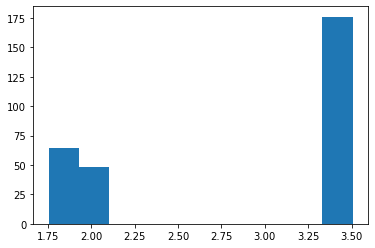

In [33]:
plt.hist(neigh.distances.flatten())

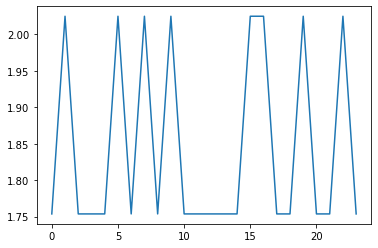

In [35]:
plt.plot(neigh.distances.min(axis=-1))

In [37]:
import numpy as np

(array([ 8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 16.]),
 array([0.62131386, 0.6331522 , 0.64499055, 0.6568289 , 0.66866725,
        0.6805056 , 0.69234395, 0.7041823 , 0.71602064, 0.72785899,
        0.73969734]),
 <BarContainer object of 10 artists>)

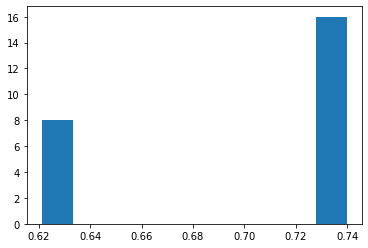

In [38]:
plt.hist(np.exp( - neigh.distances**2 / 1.8 ).sum(axis=-1))

In [39]:
def get_interstitials(structure):
    vertices = structure.analyse.get_voronoi_vertices()
    neigh = structure.get_neighborhood(positions=vertices)
    return vertices

In [44]:
def plot_interstitials(structure):
    sites = get_interstitials(structure)
    interstitials = pr.create.structure.atoms(symbols=['H'] * len(sites), positions=sites)
    return (structure + interstitials).plot3d()

In [41]:
bcc = pr.create.structure.bulk('Fe', cubic=True).repeat([1,1,2])

In [45]:
plot_interstitials(bcc)

NGLWidget()

In [46]:
bcc_sites = bcc.analyse.get_voronoi_vertices()
bcc_neigh = bcc.get_neighborhood(positions=bcc_sites)

In [54]:
bcc_neigh.distances[0, :]

array([1.60437877, 1.60437877, 1.60437877, 1.60437877, 2.58698304,
       2.58698304, 2.58698304, 2.58698304, 3.28799806, 3.28799806,
       3.28799806, 3.28799806])

(array([ 0.,  4.,  0.,  0., 11.,  0.,  0.,  8.,  0.,  1.]),
 array([1.60437877, 1.60437877, 1.60437877, 1.60437877, 1.60437877,
        1.60437877, 1.60437877, 1.60437877, 1.60437877, 1.60437877,
        1.60437877]),
 <BarContainer object of 10 artists>)

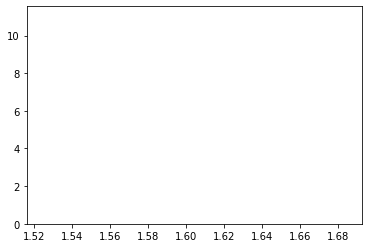

In [53]:
plt.hist(bcc_neigh.distances.min(axis=-1))

In [59]:
bcc_sites[6, :]

array([ 1.43500000e+00,  7.17500000e-01, -4.50865473e-16])

In [60]:
bcc.cell

Cell([2.87, 2.87, 5.74])

In [61]:
x = np.linspace( 7.17500000e-01, .5 * bcc.cell[0, 0], 10 )

In [63]:
pos = np.array( [x, [bcc.cell[0,0]/2] * len(x), [0] * len(x) ]).T

In [64]:
path = bcc.get_neighborhood(positions=pos)

In [67]:
(bcc + pr.create.structure.atoms(symbols=['H'] * 10, positions=pos)).plot3d()

/u/zora/software/pyiron_atomistics/pyiron_atomistics/atomistics/structure/atoms.py:2134: UserWarning: You are adding structures with different cell shapes. Taking the cell and pbc of the first structure:Cell([2.87, 2.87, 5.74])
  "Taking the cell and pbc of the first structure:{}".format(self.cell))


NGLWidget()

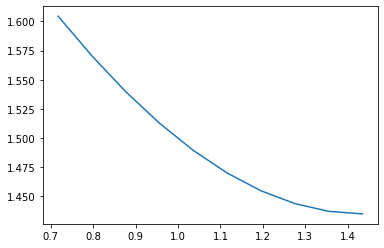

In [66]:
plt.plot(x, path.distances.min(axis=-1))

# Try to find n-Interstitials by fixing number of neighbors 

In [276]:
bcc = pr.create.structure.bulk('Fe', cubic=True).repeat(2)

In [277]:
bcc_neigh = bcc.get_neighbors(num_neighbors=14)

In [278]:
import itertools

In [279]:
import scipy.special as sp
sp.binom(12, 4)

495.0

In [280]:
perms = np.array(list(itertools.combinations(range(bcc_neigh.num_neighbors), 6-1)))
perms.shape

(2002, 5)

In [281]:
%%time
min_dists = []
for working_set in perms:
    neigh_center = bcc.positions[0] + (bcc_neigh.vecs[0, working_set, :].sum(axis=0) + 0)/6
    min_dists.append(bcc.get_neighborhood(positions=[neigh_center]).distances.min())

CPU times: user 7.93 s, sys: 282 ms, total: 8.21 s
Wall time: 8.3 s


In [282]:
bcc.cell[0,0]/2

2.87

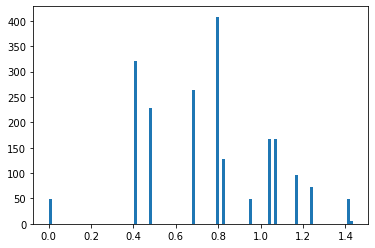

In [283]:
plt.hist(min_dists, bins=100);

In [284]:
min_dists = np.array(min_dists)

In [285]:
np.unique(min_dists)

array([1.04672831e-16, 1.81298661e-16, 2.22044605e-16, 2.56395025e-16,
       3.05171120e-16, 4.14248818e-01, 4.14248818e-01, 4.14248818e-01,
       4.14248818e-01, 4.14248818e-01, 4.14248818e-01, 4.14248818e-01,
       4.14248818e-01, 4.14248818e-01, 4.14248818e-01, 4.14248818e-01,
       4.78333333e-01, 4.78333333e-01, 4.78333333e-01, 4.78333333e-01,
       4.78333333e-01, 4.78333333e-01, 4.78333333e-01, 6.76465487e-01,
       6.76465487e-01, 6.76465487e-01, 6.76465487e-01, 6.76465487e-01,
       7.93226096e-01, 7.93226096e-01, 7.93226096e-01, 7.93226096e-01,
       7.93226096e-01, 8.28497636e-01, 8.28497636e-01, 8.28497636e-01,
       8.28497636e-01, 8.28497636e-01, 8.28497636e-01, 9.56666667e-01,
       9.56666667e-01, 9.56666667e-01, 9.56666667e-01, 1.04250333e+00,
       1.04250333e+00, 1.04250333e+00, 1.06958585e+00, 1.06958585e+00,
       1.06958585e+00, 1.17167259e+00, 1.17167259e+00, 1.17167259e+00,
       1.17167259e+00, 1.24274645e+00, 1.24274645e+00, 1.24274645e+00,
      

In [286]:
bcc_neigh.distances[0, :]

array([2.48549291, 2.48549291, 2.48549291, 2.48549291, 2.48549291,
       2.48549291, 2.48549291, 2.48549291, 2.87      , 2.87      ,
       2.87      , 2.87      , 2.87      , 2.87      ])

In [287]:
min_dists.max()

1.4349999999999998

In [288]:
perms[min_dists > 1.4][-1]

array([ 5,  6,  7, 10, 11])

In [289]:
motif_pos = np.append(bcc.positions[0] + bcc_neigh.vecs[0, perms[min_dists > 1.4][-5], :], bcc.positions[0]).reshape(-1, 3)
motif_pos = np.append(motif_pos, motif_pos.mean(axis=0)).reshape(-1, 3)

In [290]:
motif_pos.shape

(7, 3)

In [291]:
motif = pr.create.structure.atoms(symbols=['H']*5 + ['O'] + ['Fe'], positions=motif_pos, cell=bcc.cell)
motif.plot3d(particle_size=1)

NGLWidget()

In [273]:
mn = motif.get_neighbors()

In [275]:
mn.distances[-1]

array([1.41492908, 1.41492908, 1.41492908, 1.41492908, 1.41492908,
       1.83707402, 1.83707402, 1.83707402, 1.83707402, 2.47395924,
       2.47395924, 2.47395924])

# KIFS

FCC first

In [ ]:
neigh = fcc.get_neighborhood

In [138]:
%%time
min_dists = []
for working_set in itertools.combinations(range(12), 3):
    neigh_center = bcc.positions[0] + (bcc_neigh.vecs[0, working_set, :].sum(axis=0) + 0)/4
    min_dists.append(bcc.get_neighborhood(positions=[neigh_center]).distances.min())

CPU times: user 875 ms, sys: 12.2 ms, total: 888 ms
Wall time: 905 ms


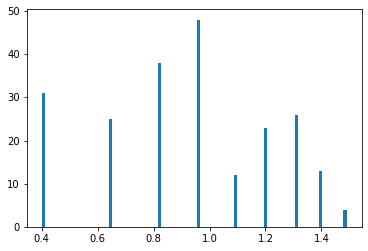

In [139]:
plt.hist(min_dists, bins=100);

In [140]:
perms = np.array(list(itertools.combinations(range(12), 3)))
perms.shape

(220, 3)

In [141]:
min_dists = np.array(min_dists)